## Análise Exploratória dos Dados

In [24]:
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd# Aprendizado de Comitês
import matplotlib.pyplot as plt
import sklearn

df_diamonds = pd.read_csv('datasets/diamonds.csv')
df_diamonds[df_diamonds.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      int64  
 1   carat       0 non-null      float64
 2   cut         0 non-null      object 
 3   color       0 non-null      object 
 4   clarity     0 non-null      object 
 5   depth       0 non-null      float64
 6   table       0 non-null      float64
 7   price       0 non-null      int64  
 8   x           0 non-null      float64
 9   y           0 non-null      float64
 10  z           0 non-null      float64
dtypes: float64(6), int64(2), object(3)
memory usage: 0.0+ bytes


In [37]:
df_diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


* ***price*** price in US dollars (\$326--\$18,823)

* ***carat*** weight of the diamond (0.2--5.01)

* ***cut*** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* ***color*** diamond colour, from J (worst) to D (best)

* ***clarity*** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* ***x*** length in mm (0--10.74)

* ***y*** width in mm (0--58.9)

* ***z*** depth in mm (0--31.8)

* ***depth*** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* ***table*** width of top of diamond relative to widest point (43--95)

### Exibe as 10 primeiras linhas do dataset

In [38]:
df_diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


### Os ultimos 10 


In [39]:
df_diamonds.tail(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
53931,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53932,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53933,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53934,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [25]:
order = {
    "cut": ["Ideal","Premium", "Very Good", "Good", "Fair"],
    "clarity": ["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1"],
    "color": ["D","E","F","G","H","I","J"]
}

<AxesSubplot:>

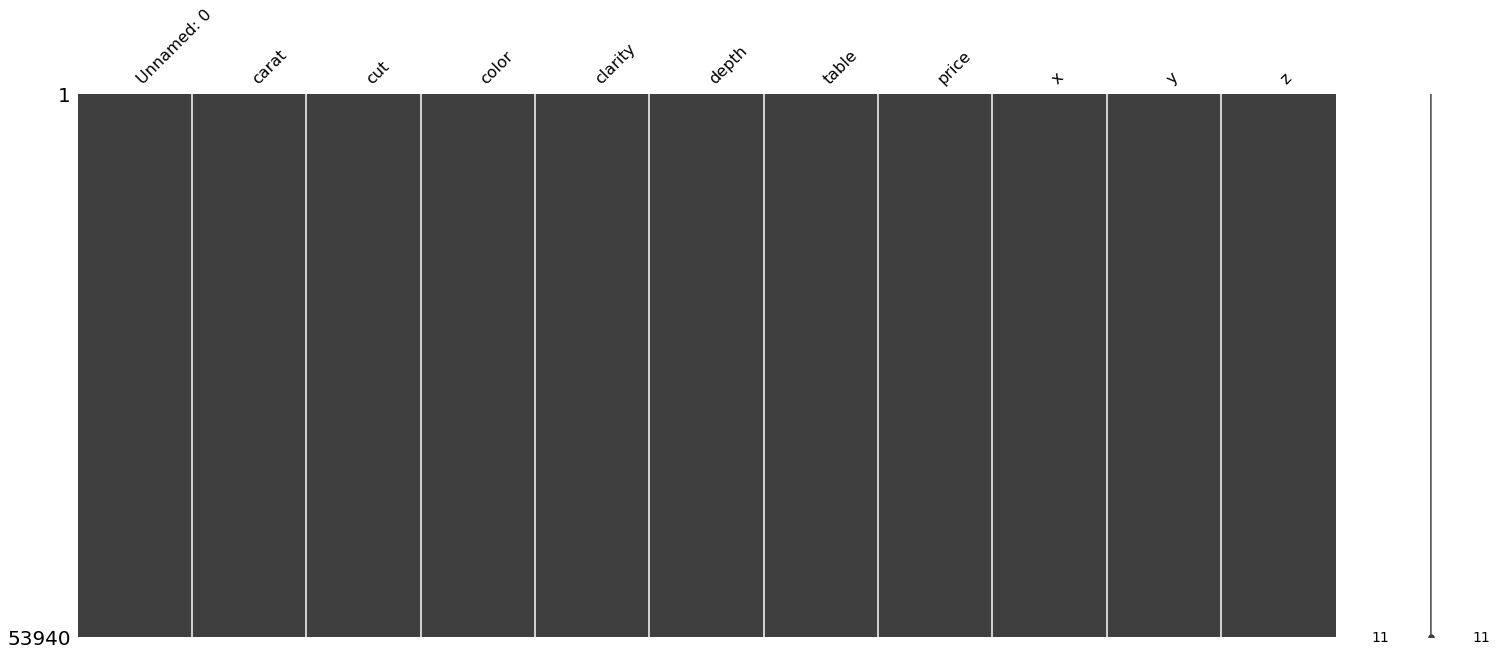

In [26]:
import missingno as msno
msno.matrix(df_diamonds)

### Analyse Exploratory

Attr: Carat
Max : 5.01
Min : 0.2
Variance: 0.22468665982277333
Std : 0.4740112444054184
mean : 0.7979397478680014
median : 0.7
mode: 0    0.3
dtype: float64
1 quartile 25%: 0.4
2 quartile 50%: 0.7
3 quartile 75%: 1.04

IQR: 0.64

Histogram = Positive skewed | prox normal


<AxesSubplot:>

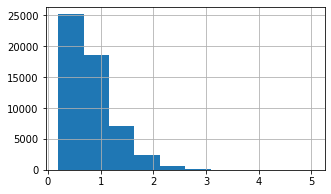

In [27]:
print('Attr: Carat')
df_attr = df_diamonds["carat"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print(f'IQR: {df_attr.quantile(q=0.75)-df_attr.quantile(q=0.25)}\n')
print('Histogram = Positive skewed | prox normal')
df_attr.hist(figsize=(5,3))

Attr: Depth
Max : 79.0
Min : 43.0
Variance: 2.0524038431766978
Std : 1.432621318833661
mean : 61.749404894327036
median : 61.8
mode: 0    62.0
dtype: float64
1 quartile 25%: 61.0
2 quartile 50%: 61.8
3 quartile 75%: 62.5

Histogram = Positive skewed


<AxesSubplot:>

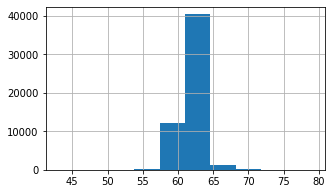

In [28]:
print('Attr: Depth')
df_attr = df_diamonds["depth"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')

df_attr.hist(figsize=(5,3))

Attr: Table
Max : 95.0
Min : 43.0
Variance: 4.9929480753375515
Std : 2.2344905628213225
mean : 57.45718390804598
median : 57.0
mode: 0    56.0
dtype: float64
1 quartile 25%: 56.0
2 quartile 50%: 57.0
3 quartile 75%: 59.0

Histogram = Positive skewed


<AxesSubplot:>

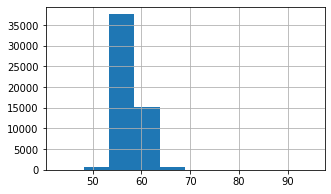

In [29]:
print('Attr: Table')
df_attr = df_diamonds["table"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')
df_attr.hist(figsize=(5,3))

Attr: Price
Max : 18823
Min : 326
Variance: 15915629.42430145
Std : 3989.439738146379
mean : 3932.799721913237
median : 2401.0
mode: 0    605
dtype: int64
1 quartile 25%: 950.0
2 quartile 50%: 2401.0
3 quartile 75%: 5324.25

Histogram = Negatively skewed


<AxesSubplot:>

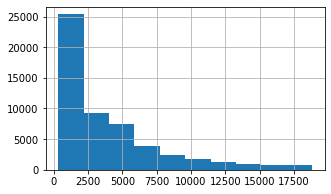

In [30]:
print('Attr: Price')
df_attr = df_diamonds["price"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Negatively skewed')
df_attr.hist(figsize=(5,3))

Attr: X
Max : 10.74
Min : 0.0
Variance: 1.258347173044451
Std : 1.1217607467924928
mean : 5.731157211716722
median : 5.7
mode: 0    4.37
dtype: float64
1 quartile 25%: 4.71
2 quartile 50%: 5.7
3 quartile 75%: 6.54

Histogram = Positive skewed


<AxesSubplot:>

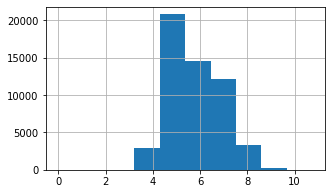

In [31]:
print('Attr: X')
df_attr = df_diamonds["x"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')
df_attr.hist(figsize=(5,3))

Attr: Y
Max : 58.9
Min : 0.0
Variance: 1.3044716138353198
Std : 1.1421346741235552
mean : 5.734525954764553
median : 5.71
mode: 0    4.34
dtype: float64
1 quartile 25%: 4.72
2 quartile 50%: 5.71
3 quartile 75%: 6.54

Histogram = Positive skewed


<AxesSubplot:>

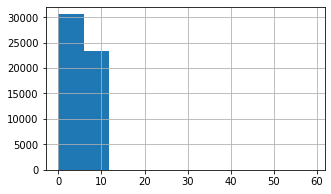

In [32]:
print('Attr: Y')
df_attr = df_diamonds["y"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')

df_attr.hist(figsize=(5,3))

Attr: Z
Max : 31.8
Min : 0.0
Variance: 0.4980108625865512
Std : 0.7056988469499941
mean : 3.5387337782721544
median : 3.53
mode: 0    2.7
dtype: float64
1 quartile 25%: 2.91
2 quartile 50%: 3.53
3 quartile 75%: 4.04

Histogram = Positive skewed


<AxesSubplot:>

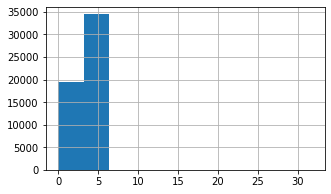

In [33]:
print('Attr: Z')
df_attr = df_diamonds["z"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')

df_attr.hist(figsize=(5,3))

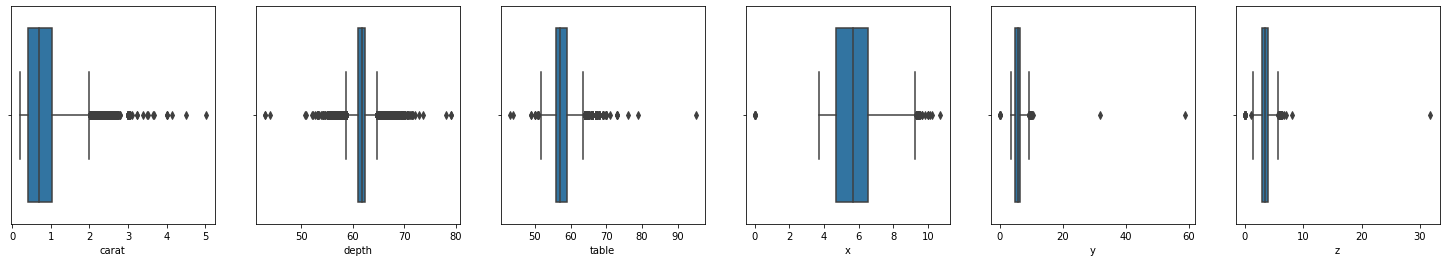

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


df_number_type = df_diamonds.select_dtypes(exclude='O')
df_without_price = df_number_type.drop("price", axis = 'columns')

plt.figure(figsize=(30,4))
for i,feature in enumerate(df_without_price.columns[1:].tolist(),1):
    plt.subplot(1,7,i)
    sns.boxplot(x=df_number_type[feature])

        
plt.show()

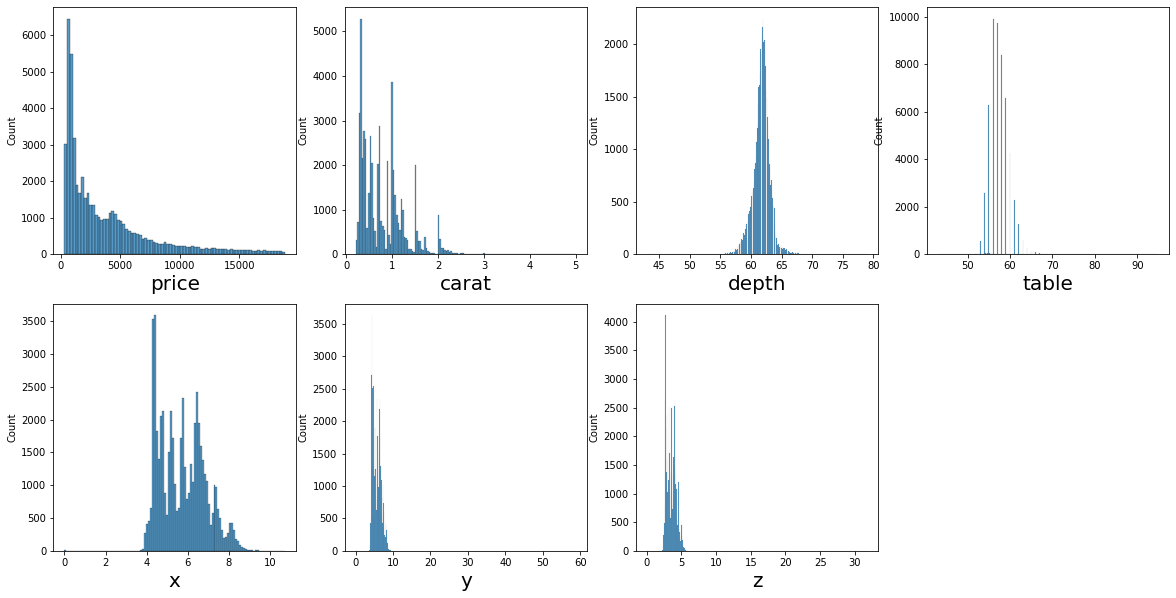

In [7]:
usecols = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
nrows, ncols = 2, 4
plt.subplots(figsize=(20,10))
for i, col in enumerate(usecols, 1):
    plt.subplot(nrows, ncols, i)
    b = sns.histplot(data=df_diamonds[col])
    b.set_xlabel(col, fontsize=20)

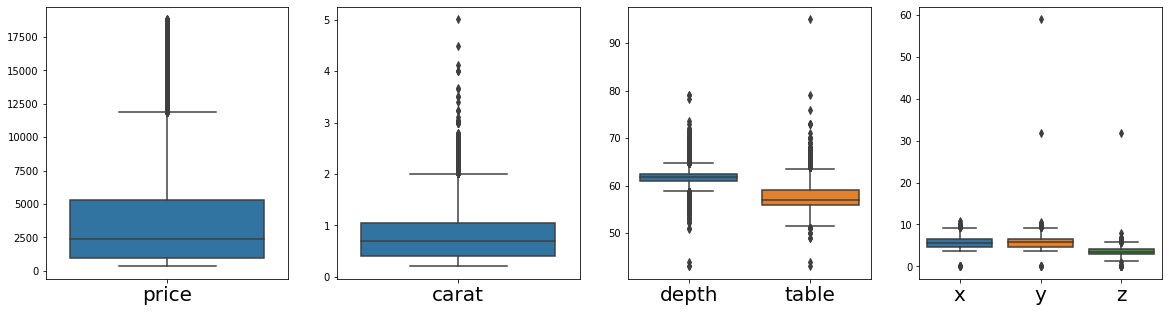

In [8]:
usecols = [['price'], ['carat'], ['depth', 'table'], ['x', 'y', 'z']]
nrows, ncols = 1, 4
plt.subplots(figsize=(20,5))
for i, col in enumerate(usecols, 1):
    plt.subplot(nrows, ncols, i)
    b = sns.boxplot(data=df_diamonds[col])
    b.set_xticklabels(col, fontsize=20)

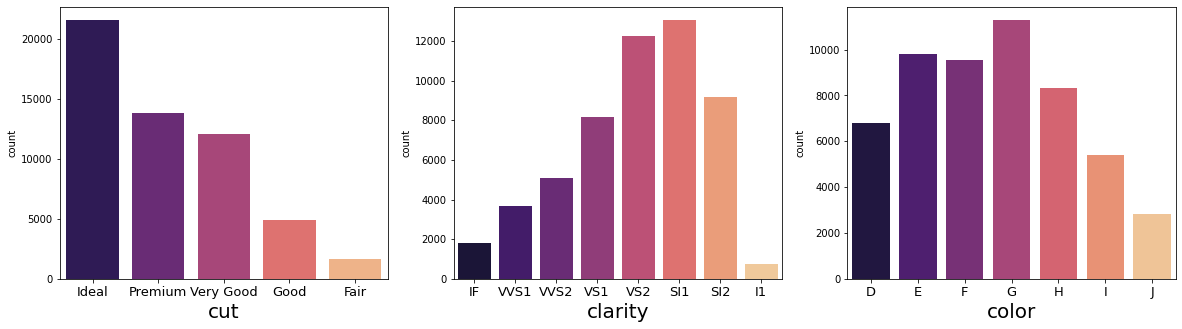

In [9]:
usecols = ['cut', 'clarity', 'color']
nrows, ncols = 1, 3
plt.subplots(figsize=(20,5))
for i, col in enumerate(usecols, 1):
    plt.subplot(nrows, ncols, i)
    b = sns.countplot(x=col, data=df_diamonds, palette='magma', order=order[col])
    b.set_xticklabels(order[col], fontsize=13)
    b.set_xlabel(col, fontsize=20)

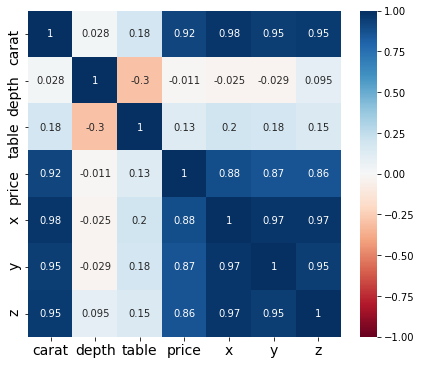

In [10]:
plt.figure(figsize=(7,6))
correlation = df_diamonds.corr()
b = sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, cmap="RdBu")
b.set_xticklabels(correlation.columns, fontsize=14)
b.set_yticklabels(correlation.columns, fontsize=14)
plt.show()

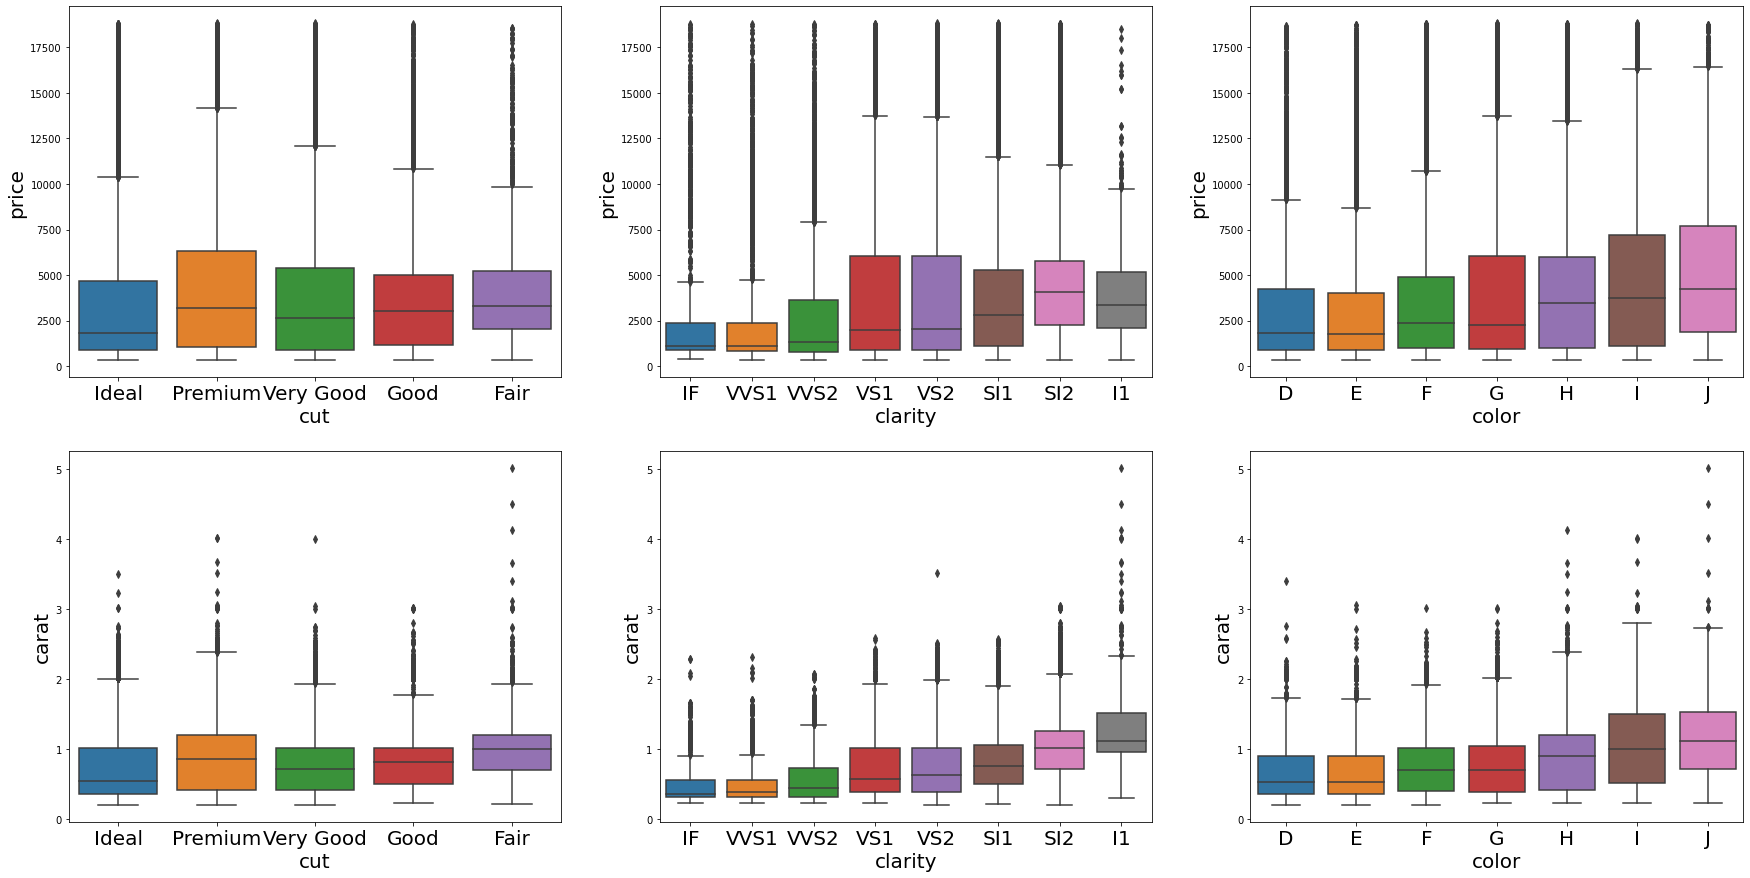

In [11]:
target_feature="price"
nrows, ncols = 2, 3
plt.figure(figsize=(30,15))
for i, row in enumerate(["price","carat"]):
    for j, col in enumerate(["cut","clarity","color"], 1):
        plt.subplot(nrows, ncols, (i*ncols) + j)
        b = sns.boxplot(data=df_diamonds, x=col, y=row, order=order[col])
        b.set_xticklabels(order[col], fontsize=20)
        b.set_xlabel(col, fontsize=20)
        b.set_ylabel(row, fontsize=20)

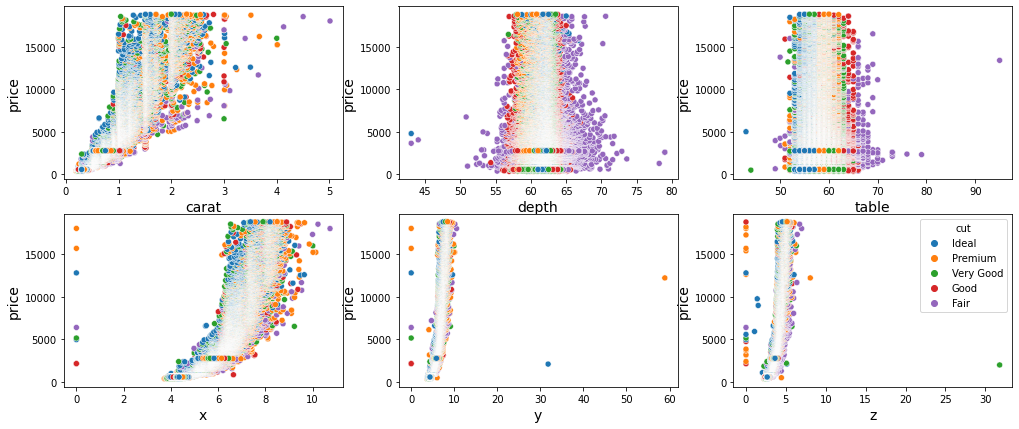

In [12]:
usecols = ['carat', 'depth', 'table', 'x', 'y', 'z']
nrows, ncols = 2, 3
plt.subplots(figsize=(17,7))
for i, col in enumerate(usecols, 1):
    plt.subplot(nrows, ncols, i)
    b = sns.scatterplot(x=col, y="price", data=df_diamonds, hue="cut", hue_order=order['cut'])
    b.set_xlabel(col, fontsize=14)
    b.set_ylabel('price', fontsize=14)
    if i < (nrows * ncols):
        b.legend_.remove()

In [13]:
y_manter = (df_diamonds['y'] < 30) & (df_diamonds['y'] > 0)
x_manter = (df_diamonds['x'] < 10) & (df_diamonds['x'] > 0)
z_manter = (df_diamonds['z'] < 30) & (df_diamonds['z'] > 0)
carat_manter = df_diamonds['carat'] < 3
df_diamonds = df_diamonds[y_manter & x_manter & z_manter & carat_manter]

/Users/disalles7/Documents/mestrado-materias/mineracao-dados/projeto-final/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


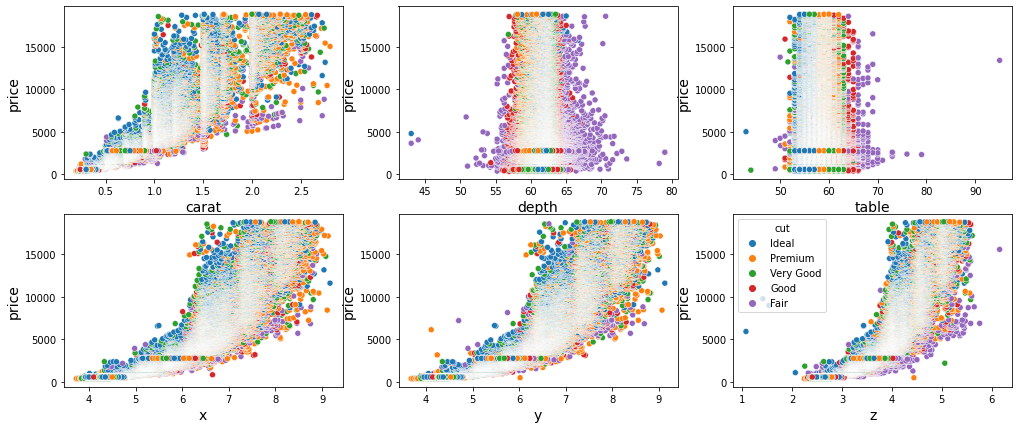

In [14]:
usecols = ['carat', 'depth', 'table', 'x', 'y', 'z']
nrows, ncols = 2, 3
plt.subplots(figsize=(17,7))
for i, col in enumerate(usecols, 1):
    plt.subplot(nrows, ncols, i)
    b = sns.scatterplot(x=col, y="price", data=df_diamonds, hue="cut", hue_order=order['cut'])
    b.set_xlabel(col, fontsize=14)
    b.set_ylabel('price', fontsize=14)
    if i < (nrows * ncols):
        b.legend_.remove()